In [1]:
import numpy as np
from typing import Callable

In [2]:
# Constants
GMs = 1.3271244 * 10 ** 11 # in km^3 s^-2. Heliocentric gravitational constant = gravitational constant * solar mass.

In [3]:
# Define the acceleration function
def acc(r: np.ndarray) -> np.ndarray:
    x, y = r
    return -GMs / (x ** 2 + y ** 2) ** (3/2) * r

In [17]:
# Find the point (p, q) where the second measurement was taken using the discussed system of equations
p, q = var('p q')
eq1 = p^2 + q^2 == 193929000^2
eq2 = (p - 193929400)^2 + q^2 ==  (33.35 * 67.69)^2
sols = solve([eq1, eq2], p, q, solution_dict=True)

# Take the solution where q > 0
psol = sols[1][p].n(digits=20)
qsol = sols[1][q].n(digits=20)

# Find the initial velocity in the x- and y-directions by dividing psol and qsol by the time interval 
v_x = (psol - 193929400)  / 67.69
v_y = qsol / 67.69

print("v_x: " + str(v_x) + " km/s")
print("v_y: " + str(v_y) + " km/s")

v_x: -5.90948037556839 km/s
v_y: 32.8222568037418 km/s


In [5]:
# Implement the algorithm. Returns a dict containing a plot of the motion, the max distance from the Sun, and the period.
def euler(acc: Callable[[np.ndarray], np.ndarray], pos: np.ndarray, vel: np.ndarray, step_size: int) -> list:
    plot = point(pos)
    steps = 0
    prev_y = None
    min_dist = np.linalg.norm(pos)
    
    while True:
        prev_y = pos[1]
        
        vel += acc(pos) * step_size
        pos += vel * step_size
        steps += 1
        # Find the closest distance to the sun
        dist = np.linalg.norm(pos)
        if dist < min_dist:
            min_dist = dist
        
        # Plot the position every 100 steps
        if steps % 100 == 0:
            plot += point(pos)

        # Halt when the position comes back above y = 0
        if prev_y < 0 and pos[1] >= 0:
            period = step_size * steps
            output = {
                "plot": plot,
                "min_dist": min_dist,
                "period": period
            }
            
            return output

In [6]:
# This takes about 30 seconds to run on my computer
comet_67P = euler(acc, np.array([193929400.0, 0.0]), np.array([v_x, v_y]), 3000)

In [7]:
print("Comet 67P")
print("Min distance: " + str(comet_67P["min_dist"]) + " km")
print("Period: " + str(comet_67P["period"]) + " s")

Comet 67P
Min distance: 186097393.30218348 km
Period: 203124000 s


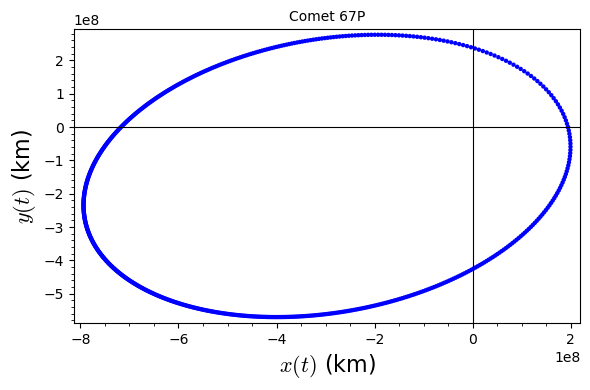

In [8]:
plot_67P = comet_67P["plot"]
plot_67P.axes_labels(['$x(t)$ (km)', '$y(t)$ (km)'])
plot_67P.show(title="Comet 67P", frame=True)

In [9]:
# Procedure repeated for 246P
eq1 = p^2 + q^2 == 429534698^2
eq2 = (p - 429534658)^2 + q^2 == (19.9 * 60)^2

sols = solve([eq1, eq2], p, q, solution_dict=True)

# Take the solution where q > 0
psol = sols[1][p].n(digits=20)
qsol = sols[1][q].n(digits=20)

# Find the initial velocity in the x- and y-directions by dividing psol and qsol by the time interval 
v_x = (psol - 429534658)  / 60.0
v_y = qsol / 60.0

print("v_x: " + str(v_x) + " km/s")
print("v_y: " + str(v_y) + " km/s")

0.666639039171552 19.8888308452622


In [10]:
comet_246P = euler(acc, np.array((429534658.0, 0.0)), np.array((v_x, v_y)), 3000)

In [14]:
print("Comet 246P")
print("Min distance: " + str(comet_246P['min_dist']) + " km")
print("Period: " + str(comet_246P['period']) + " s")

Comet 246P
Min distance: 428445179.43158984 km
Period: 252219000 s


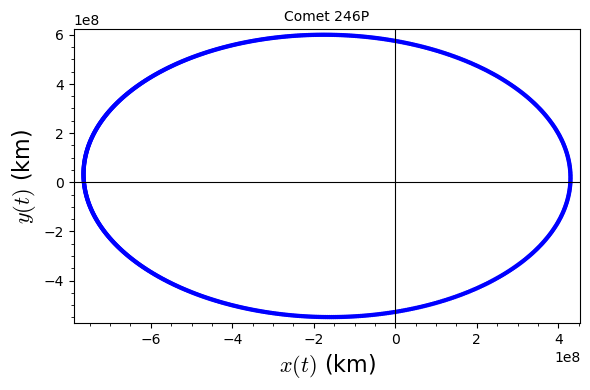

In [12]:
plot_246P = comet_246P['plot']
plot_246P.axes_labels(['$x(t)$ (km)', '$y(t)$ (km)'])
plot_246P.show(title="Comet 246P", frame=True)